In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Observation: Looking at the dataset, the label seems to be continuous in nature hence will go for a continuos model building.
# Also there are features that as of now do not seem to have relation with the label and is categorical in nature
# may consider deleting it with furter analysis

In [4]:
data.shape

(158, 12)

In [5]:
# 158 rows and 12 features

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#Observations: 
#Count is same for all the feature and hence looks like no missind data however will check into the null value
#std is comparitively lower then mean, so data looks normal
#Min value seems to have issue with 0 prcentage with features like Family, GDp, Life expectancy, Trust, Generosity

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
#Observations: 
#No null values
#2 feature shows as object and is does not have relation with predicting the happiness score 

In [36]:
data.corr() #Checking the corelation between the

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

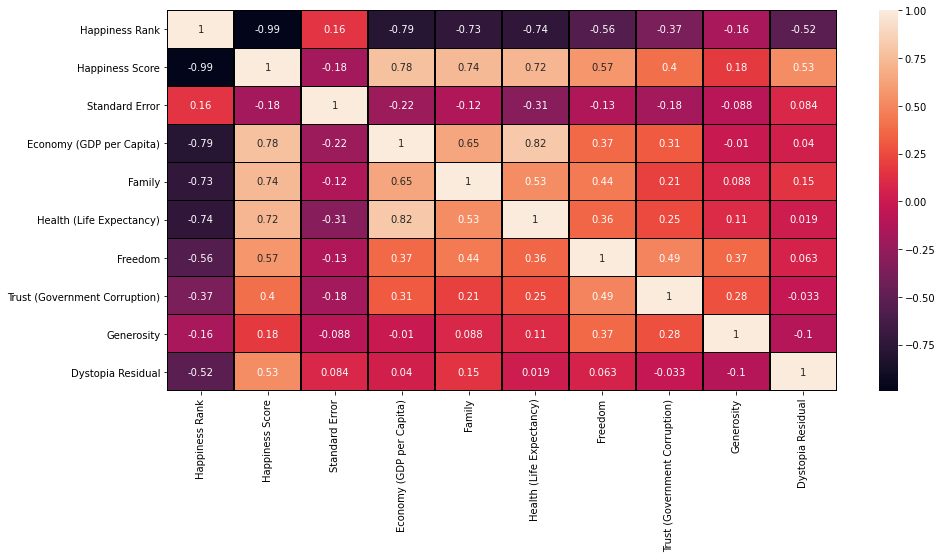

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True,linewidth=0.5,linecolor='black')

In [23]:
#dropping country and region and happiness rank as it has -0.99 corelation

In [38]:
data=data.drop(columns=['Country','Region'])
data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


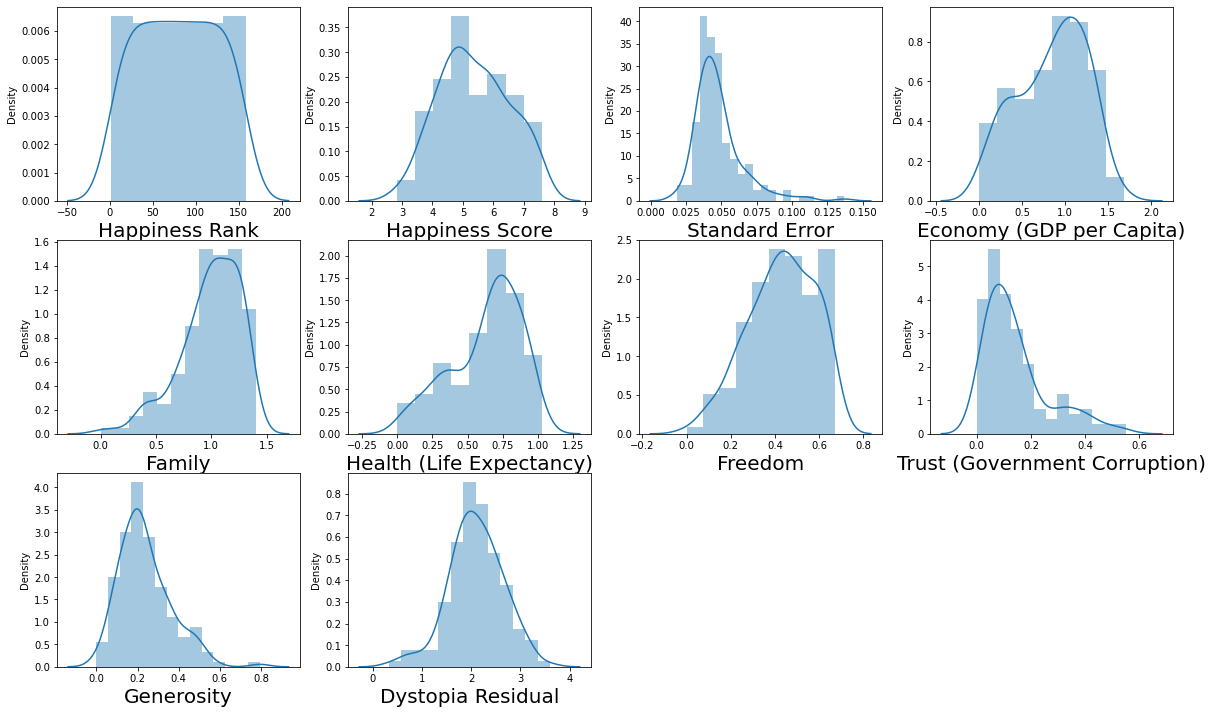

In [42]:
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber = 1

for column in data:
    if plotnumber <=10:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [49]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [43]:
#Observation on the distribution of the data.
#Economy is skewed left
#Family is skewed left
#Life Expectancy is skewed left
#Freedom is skewed left
#Trust is normally distributes
#Generosity is nomally distributes

In [44]:
#Checking for the outliers

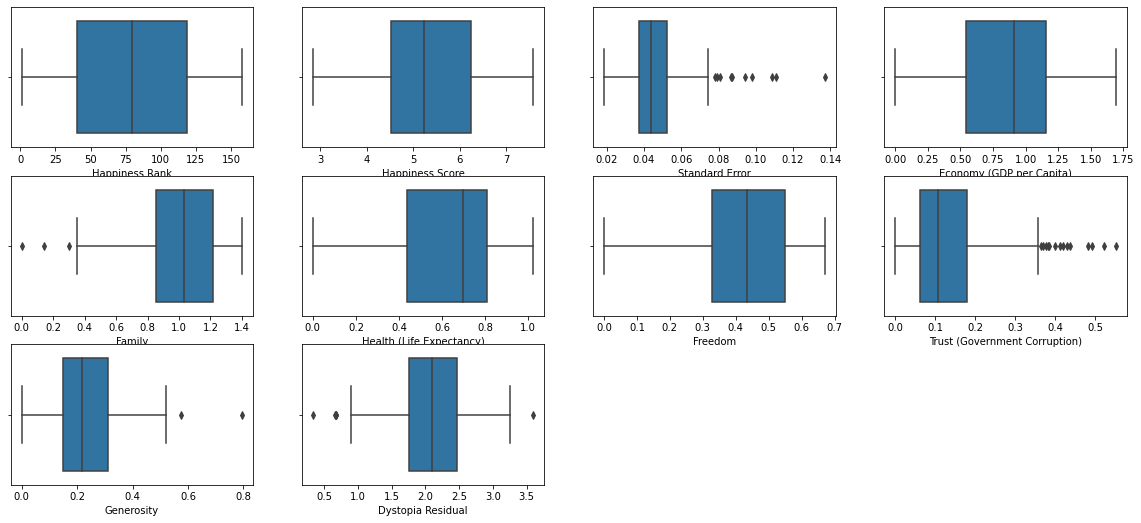

In [46]:
plt.figure(figsize=(20,15))
graph = 1

for column in data:
    if graph<=10:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [47]:
#Outliers are present in Family, Trust, Generosity, Residual however these are imporant data and can impact the result and hence not treating them.

In [50]:
#Based on the above analysis, we see that standard error data is not normally distributed and has a lot of outliers and
#Also the corr with the target is -ve 18%. Based on this analysis we will delete this feature

In [53]:
data=data.drop(['Standard Error'],axis=1)
data.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [56]:
#Splitting the dataset in feature and label

In [60]:
x=data.drop(columns=['Happiness Score']) #seperating feature and label
y=data['Happiness Score']

In [54]:
#Scalling the dataset and preparing the datset to train in the model

In [62]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [63]:
x_scaled.shape[1]

8

In [65]:
#Splitting the data in train data and test data for training and testing

In [98]:
x_train,x_test, y_train,y_test=train_test_split(x_scaled,y,test_size =0.25, random_state=344)
y_train.head()

21     6.853
147    3.678
92     5.007
54     5.848
74     5.360
Name: Happiness Score, dtype: float64

In [99]:
#Training the model with the train data

In [100]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [101]:
regression.score(x_train,y_train) #Adjusted R2 score for train data

0.9999999412015804

In [102]:
regression.score(x_test,y_test) #Adjusted R2 score for test data

0.9999999424776777

In [103]:
y_pred=regression.predict(x_test)

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))
mean_absolute_error(y_test,y_pred)

0.00022949589116567638

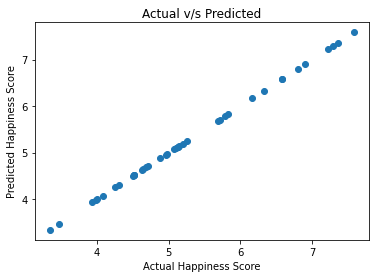

In [105]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual v/s Predicted')
plt.show()

In [120]:
#Saving the model:

In [123]:
filename='World_Happiness_Report_Model'
pickle.dump(regression,open(filename, 'wb'))

In [106]:
##Looks like the model is overfitting hence will try to do L1 and L2

In [107]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [109]:
#L1 Regularization

In [110]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [112]:
alpha=lasscv.alpha_
alpha

0.00010517560930296044

In [113]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00010517560930296044)

In [114]:
lasso_reg.score(x_test,y_test)

0.999999529325063

In [115]:
#L2

In [116]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [117]:
ridgecv.alpha_

0.001

In [118]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [119]:
ridge_model.score(x_test,y_test)

0.9999999405550961

In [ ]:
## Used Regularization techniques and the scores are same hence the model was not overfitting.